In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | babanusah
City not found. Skipping...
Processing Record 4 of Set 1 | nantucket
Processing Record 5 of Set 1 | karaul
City not found. Skipping...
Processing Record 6 of Set 1 | flin flon
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rungata
City not found. Skipping...
Processing Record 9 of Set 1 | ouadda
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | lososina
Processing Record 12 of Set 1 | omboue
Processing Record 13 of Set 1 | iwanai
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | la ronge
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | roura
Processing Record 20 of Set 1 | hambantota
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | khatanga
Processing 

City not found. Skipping...
Processing Record 37 of Set 4 | esna
Processing Record 38 of Set 4 | san andres
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | karlstad
Processing Record 41 of Set 4 | coihaique
Processing Record 42 of Set 4 | isla mujeres
Processing Record 43 of Set 4 | butterworth
Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | ornskoldsvik
Processing Record 46 of Set 4 | vanavara
Processing Record 47 of Set 4 | pirovskoye
Processing Record 48 of Set 4 | waipawa
Processing Record 49 of Set 4 | tura
Processing Record 50 of Set 4 | katsuura
Processing Record 1 of Set 5 | luau
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | aykhal
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | nogliki
Processing Record 6 of Set 5 | pitimbu
Processing Record 7 of Set 5 | joshimath
Processing Record 8 of Set 5 | beyneu
Processing Record 9 of Set 5 | aquidaba
Processing Record 10 of Set 5 | praxedis

Processing Record 29 of Set 8 | plainview
Processing Record 30 of Set 8 | upernavik
Processing Record 31 of Set 8 | peace river
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | fakel
Processing Record 35 of Set 8 | polyarnyy
Processing Record 36 of Set 8 | kameshkovo
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | chardara
Processing Record 39 of Set 8 | nouadhibou
Processing Record 40 of Set 8 | sarkand
Processing Record 41 of Set 8 | dandong
Processing Record 42 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 8 | dukat
Processing Record 44 of Set 8 | port-gentil
Processing Record 45 of Set 8 | alekseyevsk
Processing Record 46 of Set 8 | ust-nera
Processing Record 47 of Set 8 | comodoro rivadavia
Processing Record 48 of Set 8 | garden city
Processing Record 49 of Set 8 | visnes
Processing Record 50 of Set 8 | miranorte
City not found. Skipping...
Processi

Processing Record 19 of Set 12 | nguiu
City not found. Skipping...
Processing Record 20 of Set 12 | voloiac
Processing Record 21 of Set 12 | ponezhukay
Processing Record 22 of Set 12 | mogadishu
Processing Record 23 of Set 12 | chernyshevskiy
Processing Record 24 of Set 12 | nawabganj
Processing Record 25 of Set 12 | tashla
Processing Record 26 of Set 12 | sibolga
Processing Record 27 of Set 12 | sajanan
Processing Record 28 of Set 12 | kapit
Processing Record 29 of Set 12 | ugento
Processing Record 30 of Set 12 | kincardine
Processing Record 31 of Set 12 | mouila
Processing Record 32 of Set 12 | galle
Processing Record 33 of Set 12 | erdenet
Processing Record 34 of Set 12 | nybro
Processing Record 35 of Set 12 | impfondo
Processing Record 36 of Set 12 | ust-karsk
Processing Record 37 of Set 12 | llanes
Processing Record 38 of Set 12 | voskresenskoye
Processing Record 39 of Set 12 | alofi
Processing Record 40 of Set 12 | san borja
Processing Record 41 of Set 12 | miragoane
Processing R

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.6481,15.1594,56.88,75,53,14.14,NA,2021-07-12 19:09:50
1,Hermanus,-34.4187,19.2345,48.79,69,100,27.51,ZA,2021-07-12 19:08:13
2,Nantucket,41.2835,-70.0995,75.31,88,90,6.91,US,2021-07-12 19:15:06
3,Flin Flon,54.7682,-101.8650,79.23,30,2,14.05,CA,2021-07-12 19:15:07
4,Mataura,-46.1927,168.8643,39.49,97,100,2.15,NZ,2021-07-12 19:09:17
5,Ouadda,8.0777,22.4007,69.17,95,71,3.60,CF,2021-07-12 19:15:08
6,Albany,42.6001,-73.9662,73.67,94,100,3.85,US,2021-07-12 19:09:18
7,Lososina,48.9975,140.3106,60.84,99,49,2.59,RU,2021-07-12 19:15:09
8,Omboue,-1.5746,9.2618,73.49,85,8,11.45,GA,2021-07-12 19:10:31
9,Iwanai,42.9744,140.5089,66.11,97,41,4.83,JP,2021-07-12 19:15:10


In [9]:
#New column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Formatting in DataFrame
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2021-07-12 19:09:50,-26.6481,15.1594,56.88,75,53,14.14
1,Hermanus,ZA,2021-07-12 19:08:13,-34.4187,19.2345,48.79,69,100,27.51
2,Nantucket,US,2021-07-12 19:15:06,41.2835,-70.0995,75.31,88,90,6.91
3,Flin Flon,CA,2021-07-12 19:15:07,54.7682,-101.8650,79.23,30,2,14.05
4,Mataura,NZ,2021-07-12 19:09:17,-46.1927,168.8643,39.49,97,100,2.15
...,...,...,...,...,...,...,...,...,...
551,Ola,RU,2021-07-12 19:19:40,59.5833,151.2833,51.71,92,100,1.99
552,Andenes,NO,2021-07-12 19:19:41,69.3143,16.1194,58.98,82,75,3.44
553,Ingraj Bazar,IN,2021-07-12 19:19:41,25.0000,88.1500,84.42,76,81,7.02
554,Ingham,US,2021-07-12 19:19:42,42.6000,-84.3833,72.30,94,90,4.61


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

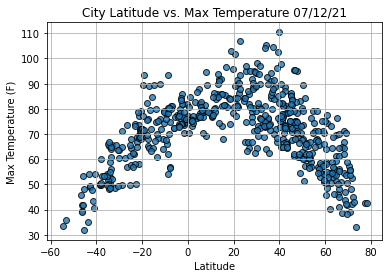

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

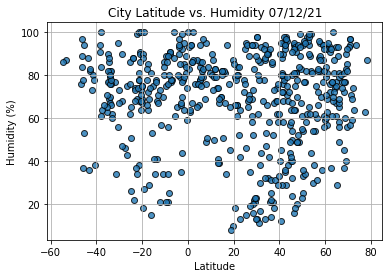

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

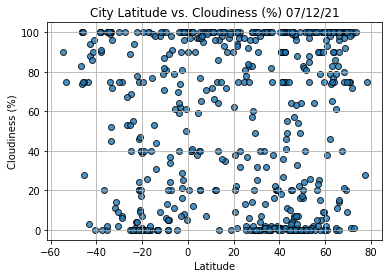

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

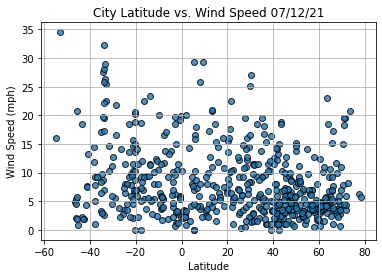

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()